In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# LAB MODULE 2.
# Observational data in climate science
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Topics covered:
# (1) Organization of geospatial data in python
# (2) Operations in time
# (3) Operations in space 

# The purpose of this exercise is to (partially) replicate the process of 
# building of a global mean tempertaure anomaly curve from observations 

# Links: 
#   https://journals.ametsoc.org/doi/pdf/10.1175/1520-0450%281986%29025%3C0161%3ANHSATV%3E2.0.CO%3B2
#   https://www.metoffice.gov.uk/hadobs/crutem4/data/download.html  >>>  CRUTEM.4.6.0.0.station_files.zip

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Exercise 2 (ASSIGNMENT)
# Answer the following questions:
# 1) What is the difference in the average the global mean temperature anomaly for the last 
#    30 years of the record, compared to that of the first three decades of the twentieth century ?
# 2) Is this difference statistically significant ?
# You can use and extend the example from class.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [3]:
# Libraries

import pandas as pd

from scipy import stats


In [4]:
# Read the global annual mean temparature anomalies time series exported from the main exercise
# and set a datetime index

gmta = pd.read_csv('gmta_10295_stations')  # temperature medie globali anno per anno

gmta = gmta.set_index('time')
gmta.index = pd.to_datetime(gmta.index)

gmta

,gmta
time,
1850-12-31,-0.564252
1851-12-31,-0.117734
1852-12-31,-0.329241
1853-12-31,-0.369994
1854-12-31,-0.060377
...,...
2014-12-31,0.963406
2015-12-31,1.020377
2016-12-31,1.453652


<AxesSubplot:xlabel='time'>

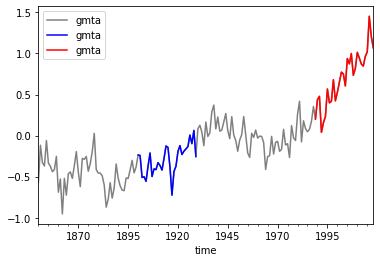

In [5]:
# Let's slice out the two periods and plot to check

gmta_first = gmta['1900-01-31':'1929-12-31']  # prime 3 decadi del secolo

gmta_last = gmta.iloc[-30:]  # ultimi 30 anni

p0 = gmta.plot(color='grey')
gmta_first.plot(ax=p0,color='blue')
gmta_last.plot(ax=p0,color='red')

In [6]:
# con i prossimi step confermiamo la differenza che possiamo vedere anche visivamente

# Calculate the difference in mean temperature between the two periods

diff = gmta_last.mean() - gmta_first.mean()  # la temperatura è aumentata di 1 grado centigrado
diff

gmta    0.998128
dtype: float64

In [7]:
# Then perform a hypothesis test for difference in the mean (e.g. Student's t test)

# If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, 
#  then we reject the null hypothesis of equal averages.

tt = stats.ttest_ind(gmta_last, gmta_first, equal_var = False)
tt

# le due medie non sono uguali

Ttest_indResult(statistic=array([14.59593888]), pvalue=array([1.66620609e-18]))